# More EDA
- Investigate categorical features

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import set_style
set_style("whitegrid")

#### Start with DF from eda notebook

In [18]:
df = pd.read_csv('./data/working_df.csv')
df.head()

,team,team_id,year,conference,games_played,expected_wins,wins,losses,elo,fpi,...,def_drives,off_explode,def_explode,off_ppa,def_ppa,off_success_rate,def_success_rate,coach,win_pct,loss_pct
0,Air Force,2005,2014,Mountain West,13,9.7,10,3,1071.0,-16.682,...,137,0.860561,0.902638,0.096601,0.214295,0.439644,0.518913,Troy Calhoun,0.769231,0.230769
1,Akron,2006,2014,Mid-American,12,5.4,5,7,1121.0,-12.121,...,156,0.973352,0.952424,0.023091,0.066849,0.385876,0.405172,Terry Bowden,0.416667,0.583333
2,Alabama,333,2014,SEC,14,11.7,12,2,2114.0,28.891,...,150,0.915606,0.912426,0.185958,-0.008829,0.501961,0.379076,Nick Saban,0.857143,0.142857
3,Arizona,12,2014,Pac-12,14,8.8,10,4,1652.0,13.168,...,173,0.848512,0.930193,0.100022,0.033014,0.451943,0.402116,Rich Rodriguez,0.714286,0.285714
4,Arizona State,9,2014,Pac-12,13,9.7,10,3,1823.0,21.855,...,189,0.905857,1.075455,0.088031,0.090247,0.449318,0.383734,Todd Graham,0.769231,0.230769


In [27]:
df.columns

Index(['team', 'team_id', 'year', 'conference', 'games_played',
       'expected_wins', 'wins', 'losses', 'elo', 'fpi', 'conference_rating',
       'recruiting_rank', 'points', 'blue_chip', 'blue_chip_ratio',
       'passing_usage', 'rushing_usage', 'usages', 'off_drives', 'def_drives',
       'off_explode', 'def_explode', 'off_ppa', 'def_ppa', 'off_success_rate',
       'def_success_rate', 'coach', 'win_pct', 'loss_pct', 'coach_win_pct'],
      dtype='object')

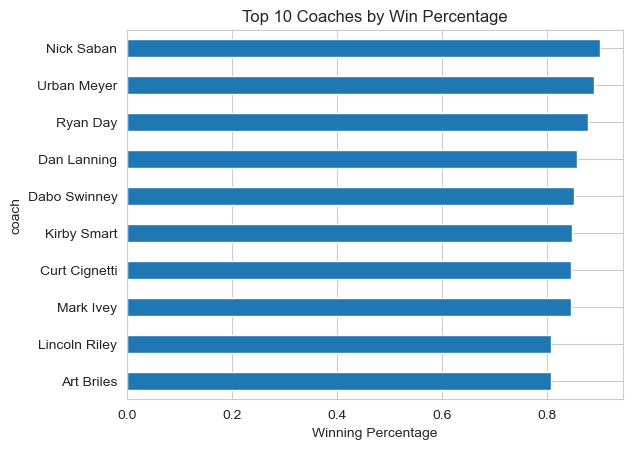

In [5]:
# Get average win percent by coaches
win_pct_by_coach = df.groupby(by='coach')['win_pct'].mean().sort_values(ascending=False).head(10)[::-1]
win_pct_by_coach.plot(kind='barh')
plt.title('Top 10 Coaches by Win Percentage')
plt.xlabel('Winning Percentage')
plt.show()

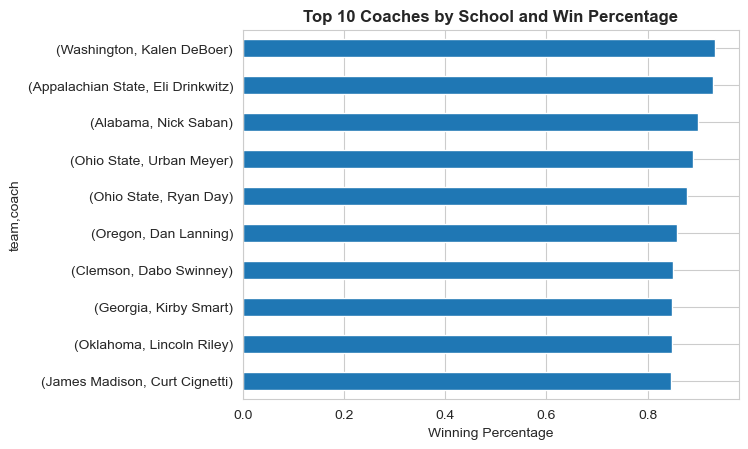

In [6]:
# Look at win pct by coach and school
win_pct_by_coach = df.groupby(by=['team', 'coach'])['win_pct'].mean().sort_values(ascending=False).head(10)[::-1]
win_pct_by_coach.plot(kind='barh')
plt.title('Top 10 Coaches by School and Win Percentage', fontweight='bold')
plt.xlabel('Winning Percentage')
plt.show()

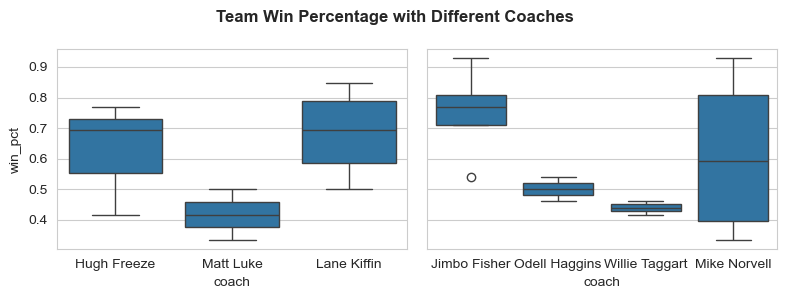

In [79]:
fig, axes = plt.subplots(1,2, figsize=(8,3), sharey=True)
sns.boxplot(data=df[df.team == 'Ole Miss'], x='coach', y='win_pct', ax=axes[0])
sns.boxplot(data=df[df.team == 'Florida State'], x='coach', y='win_pct', ax=axes[1])

plt.suptitle('Team Win Percentage with Different Coaches', fontweight='bold')
plt.tight_layout()
plt.savefig('images/school-win-pct-by-coach.png')
plt.show()

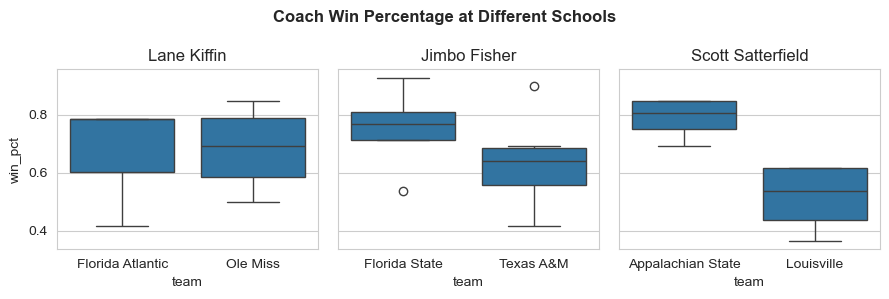

In [66]:
# Graph win pct of coach at different schools
fig, axes = plt.subplots(1,3, figsize=(9,3), sharey=True)
sns.boxplot(data=df[df.coach == 'Lane Kiffin'], x='team', y='win_pct', ax=axes[0])
sns.boxplot(data=df[df.coach == 'Jimbo Fisher'], x='team', y='win_pct', ax=axes[1])
sns.boxplot(data=df[df.coach == 'Scott Satterfield'], x='team', y='win_pct', ax=axes[2])
axes[0].set_title('Lane Kiffin')
axes[1].set_title('Jimbo Fisher')
axes[2].set_title('Scott Satterfield')
plt.suptitle('Coach Win Percentage at Different Schools', fontweight='bold')
plt.tight_layout()
plt.savefig('images/coach_win_pct_by_school.png')
plt.show()

In [21]:
# Get the overall win_pct of a given coach regardless of school
coach_win_pct = df.groupby(by=['coach'])['win_pct'].mean().reset_index()

#coach_win_pct = coach_win_pct.rename(columns={'win_pct': 'coach_win_pct'})
#df = df.merge(coach_win_pct, on='coach')
#df.head()

,team,team_id,year,conference,games_played,expected_wins,wins,losses,elo,fpi,...,off_explode,def_explode,off_ppa,def_ppa,off_success_rate,def_success_rate,coach,win_pct,loss_pct,coach_win_pct
0,Air Force,2005,2014,Mountain West,13,9.7,10,3,1071.0,-16.682,...,0.860561,0.902638,0.096601,0.214295,0.439644,0.518913,Troy Calhoun,0.769231,0.230769,0.652015
1,Akron,2006,2014,Mid-American,12,5.4,5,7,1121.0,-12.121,...,0.973352,0.952424,0.023091,0.066849,0.385876,0.405172,Terry Bowden,0.416667,0.583333,0.397436
2,Alabama,333,2014,SEC,14,11.7,12,2,2114.0,28.891,...,0.915606,0.912426,0.185958,-0.008829,0.501961,0.379076,Nick Saban,0.857143,0.142857,0.900183
3,Arizona,12,2014,Pac-12,14,8.8,10,4,1652.0,13.168,...,0.848512,0.930193,0.100022,0.033014,0.451943,0.402116,Rich Rodriguez,0.714286,0.285714,0.510302
4,Arizona State,9,2014,Pac-12,13,9.7,10,3,1823.0,21.855,...,0.905857,1.075455,0.088031,0.090247,0.449318,0.383734,Todd Graham,0.769231,0.230769,0.533832


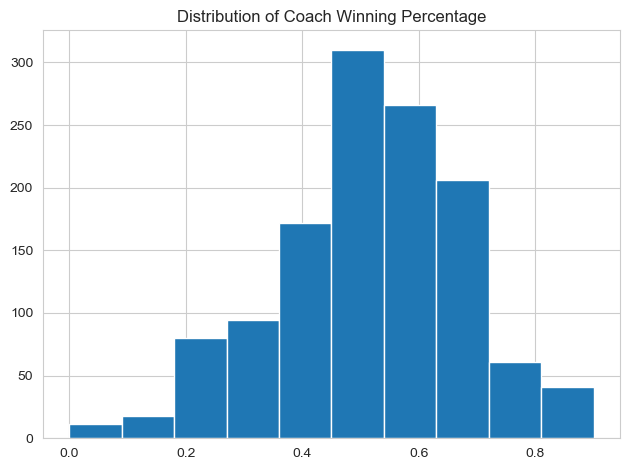

In [75]:
# Graph distribution of coach winning pct
plt.hist(df.coach_win_pct)
plt.title('Distribution of Coach Winning Percentage')
plt.tight_layout()
plt.savefig('images/dist_coach_pct.png')
plt.show()

### Looking at Effects of Coaches (including before 2014)
- Get rid of usage stats and go back to 2005

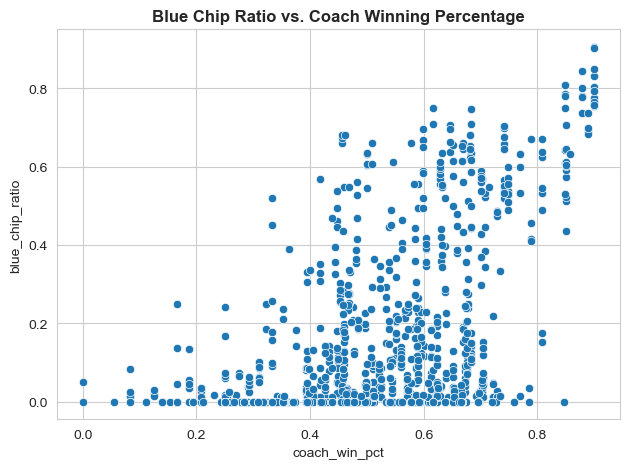

In [50]:
sns.scatterplot(data=df, x='coach_win_pct', y='blue_chip_ratio')
plt.title('Blue Chip Ratio vs. Coach Winning Percentage', fontweight='bold')
plt.tight_layout()
plt.savefig('images/blue-chip-vs-coach-win-pct.png')
plt.show()

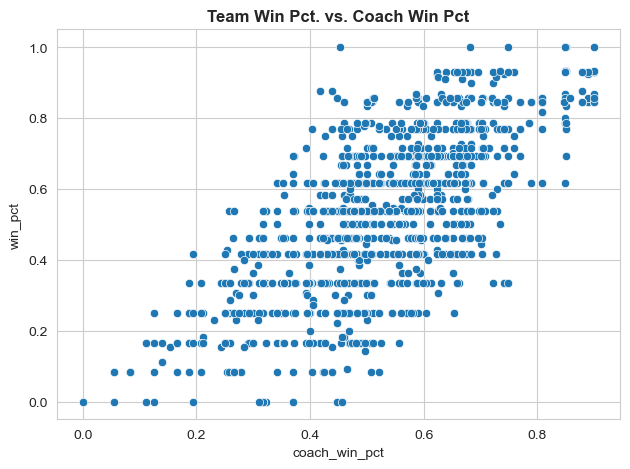

In [74]:
sns.scatterplot(data=df, x='coach_win_pct', y='win_pct')
plt.title('Team Win Pct. vs. Coach Win Pct', fontweight='bold')
plt.tight_layout()
plt.savefig('images/win-vs-coach-win-pct.png')
plt.show()

### Update working dataframe
- We added coaching overall win percentage (regardless of school)
- Obviously, some coaches will have only had 1 school they've coached at
- Creating a one-hot encoding of coaches would add too many features, so we'll stick with their overall win_pct. But we will use the coach's win_pct from the previous year so we need to move by 1 year

In [ ]:
df

In [22]:
df.to_csv('data/working_df.csv', index=False)

### Blue Chip and Win Pct by Conference

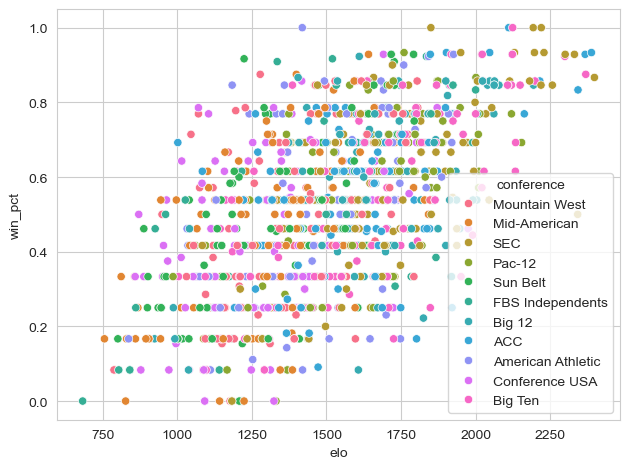

In [29]:
sns.scatterplot(data=df, x='elo', y='win_pct', hue='conference')
plt.tight_layout()
plt.show()